In [1]:
import pandas as pd
df = pd.read_pickle(r'D:\Py_Prjs\OPA_repo\ClusterAnalysis\KMeans\Data\df_allInfo_clean.pkl')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, A to ON
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   heldPercentInstitutions       503 non-null    float64
 1   ebitdaMargins                 503 non-null    float64
 2   grossProfits                  503 non-null    float64
 3   recommendationKey             503 non-null    object 
 4   operatingMargins              503 non-null    float64
 5   grossMargins                  503 non-null    float64
 6   profitMargins                 503 non-null    float64
 7   industry                      503 non-null    object 
 8   shortName                     503 non-null    object 
 9   country                       503 non-null    object 
 10  revenuePerShare               503 non-null    float64
 11  exchange                      503 non-null    object 
 12  city                          503 non-null    object 
 13  sharesShort

In [3]:
df_numeric = df.select_dtypes(include=['float64'])

In [4]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, A to ON
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   heldPercentInstitutions       503 non-null    float64
 1   ebitdaMargins                 503 non-null    float64
 2   grossProfits                  503 non-null    float64
 3   operatingMargins              503 non-null    float64
 4   grossMargins                  503 non-null    float64
 5   profitMargins                 503 non-null    float64
 6   revenuePerShare               503 non-null    float64
 7   sharesShort                   503 non-null    float64
 8   sharesPercentSharesOut        503 non-null    float64
 9   shortRatio                    503 non-null    float64
 10  heldPercentInsiders           503 non-null    float64
 11  sharesShortPriorMonth         503 non-null    float64
 12  enterpriseValue               503 non-null    float64
 13  fiftyTwoWee

In [5]:
df_numeric

,heldPercentInstitutions,ebitdaMargins,grossProfits,operatingMargins,grossMargins,profitMargins,revenuePerShare,sharesShort,sharesPercentSharesOut,shortRatio,...,currentRatio,returnOnEquity,enterpriseToEbitda,trailingAnnualDividendRate,trailingAnnualDividendYield,debtToEquity,earningsQuarterlyGrowth,earningsGrowth,SandP52WeekChange,52WeekChange
symbol,,,,,,,,,,,,,,,,,,,,,
A,0.90577,0.28256,3.722000e+09,0.23627,0.54352,0.18312,22.903,2889384.0,0.0098,2.35,...,2.030,0.23488,24.619,0.84,0.005550,52.354,-0.167,-0.151,-0.16165,-0.031732
AAL,0.55648,0.05309,1.934000e+09,0.00031,0.19931,-0.03557,69.575,91398791.0,0.1406,2.89,...,0.791,NaN,17.758,0.00,0.000000,NaN,1.858,1.735,-0.16165,-0.213933
AAP,1.01323,0.09143,4.931356e+09,0.06612,0.44654,0.04304,181.297,3082173.0,0.0520,3.74,...,1.132,0.16130,12.728,5.50,0.037793,150.469,-0.346,-0.313,-0.16165,-0.378157
AAPL,0.59976,0.33105,1.707820e+11,0.30289,0.43310,0.25310,24.317,114431895.0,0.0072,1.23,...,0.879,1.75459,18.514,0.90,0.006298,261.446,0.008,0.048,-0.16165,-0.183745
ABBV,0.70811,0.50850,3.888300e+10,0.36514,0.69832,0.23188,32.638,12907317.0,0.0073,2.35,...,0.928,0.90650,11.822,5.64,0.034449,436.757,0.242,0.242,-0.16165,0.343399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LEN,0.95297,0.22901,7.333336e+09,0.22657,0.28221,0.14037,108.868,11379971.0,0.0391,4.13,...,13.944,0.20490,3.781,0.75,0.008386,24.744,0.043,0.114,NaN,NaN
CBOE,0.86242,0.28991,1.476100e+09,0.24638,0.43974,0.05802,34.147,2549419.0,0.0228,2.87,...,1.208,0.06306,14.079,1.74,0.013720,64.947,NaN,NaN,NaN,NaN
DLR,0.95624,0.47367,2.791645e+09,0.13887,0.60027,0.31945,15.814,9277983.0,0.0323,3.68,...,0.706,0.07991,22.606,4.52,0.042117,90.188,0.766,0.711,NaN,NaN


In [6]:
cnt = df_numeric.isnull().sum()
cnt.sort_values(ascending=False)

52WeekChange                    190
SandP52WeekChange               190
earningsGrowth                   65
earningsQuarterlyGrowth          64
debtToEquity                     61
trailingAnnualDividendYield      42
trailingAnnualDividendRate       42
enterpriseToEbitda               35
returnOnEquity                   32
currentRatio                     30
quickRatio                       30
beta                             17
targetHighPrice                  14
targetLowPrice                   14
targetMedianPrice                14
targetMeanPrice                  14
recommendationMean               13
payoutRatio                      12
priceToSalesTrailing12Months      9
returnOnAssets                    7
pegRatio                          6
revenueGrowth                     5
totalCashPerShare                 5
enterpriseToRevenue               5
fullTimeEmployees                 5
forwardPE                         4
trailingEps                       4
forwardEps                  

In [7]:
X = df_numeric.fillna(df_numeric.median())

In [8]:
X

,heldPercentInstitutions,ebitdaMargins,grossProfits,operatingMargins,grossMargins,profitMargins,revenuePerShare,sharesShort,sharesPercentSharesOut,shortRatio,...,currentRatio,returnOnEquity,enterpriseToEbitda,trailingAnnualDividendRate,trailingAnnualDividendYield,debtToEquity,earningsQuarterlyGrowth,earningsGrowth,SandP52WeekChange,52WeekChange
symbol,,,,,,,,,,,,,,,,,,,,,
A,0.90577,0.28256,3.722000e+09,0.23627,0.54352,0.18312,22.903,2889384.0,0.0098,2.35,...,2.030,0.23488,24.619,0.84,0.005550,52.354,-0.167,-0.151,-0.16165,-0.031732
AAL,0.55648,0.05309,1.934000e+09,0.00031,0.19931,-0.03557,69.575,91398791.0,0.1406,2.89,...,0.791,0.17211,17.758,0.00,0.000000,79.813,1.858,1.735,-0.16165,-0.213933
AAP,1.01323,0.09143,4.931356e+09,0.06612,0.44654,0.04304,181.297,3082173.0,0.0520,3.74,...,1.132,0.16130,12.728,5.50,0.037793,150.469,-0.346,-0.313,-0.16165,-0.378157
AAPL,0.59976,0.33105,1.707820e+11,0.30289,0.43310,0.25310,24.317,114431895.0,0.0072,1.23,...,0.879,1.75459,18.514,0.90,0.006298,261.446,0.008,0.048,-0.16165,-0.183745
ABBV,0.70811,0.50850,3.888300e+10,0.36514,0.69832,0.23188,32.638,12907317.0,0.0073,2.35,...,0.928,0.90650,11.822,5.64,0.034449,436.757,0.242,0.242,-0.16165,0.343399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LEN,0.95297,0.22901,7.333336e+09,0.22657,0.28221,0.14037,108.868,11379971.0,0.0391,4.13,...,13.944,0.20490,3.781,0.75,0.008386,24.744,0.043,0.114,-0.16165,-0.111557
CBOE,0.86242,0.28991,1.476100e+09,0.24638,0.43974,0.05802,34.147,2549419.0,0.0228,2.87,...,1.208,0.06306,14.079,1.74,0.013720,64.947,0.039,0.056,-0.16165,-0.111557
DLR,0.95624,0.47367,2.791645e+09,0.13887,0.60027,0.31945,15.814,9277983.0,0.0323,3.68,...,0.706,0.07991,22.606,4.52,0.042117,90.188,0.766,0.711,-0.16165,-0.111557


In [9]:
#simple kMean 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
c = kmeans.cluster_centers_
l = kmeans.labels_

d:\Py_Prjs\envs\.ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
len(l)

503

In [11]:
df_simp_cluster = pd.merge(pd.Series(X.index), pd.Series(l, name='cluster'), right_index=True, left_index=True)

In [12]:
df_simp_cluster.cluster.value_counts()

0    498
1      5
Name: cluster, dtype: int64

In [13]:
df_simp_cluster[df_simp_cluster.cluster == 1]

,symbol,cluster
3,AAPL,1
28,AMZN,1
228,MSFT,1
236,GOOG,1
351,GOOGL,1


In [ ]:
## Insert your code here
from scipy.spatial.distance import cdist
import numpy as np
range_n_clusters = list(range(2, 101)) 
distortions = []

for n_clusters in range_n_clusters:
    cluster = KMeans(n_clusters = n_clusters)
    cluster.fit(X)
    distortions.append(sum(np.min(cdist(X, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(X, axis = 0))


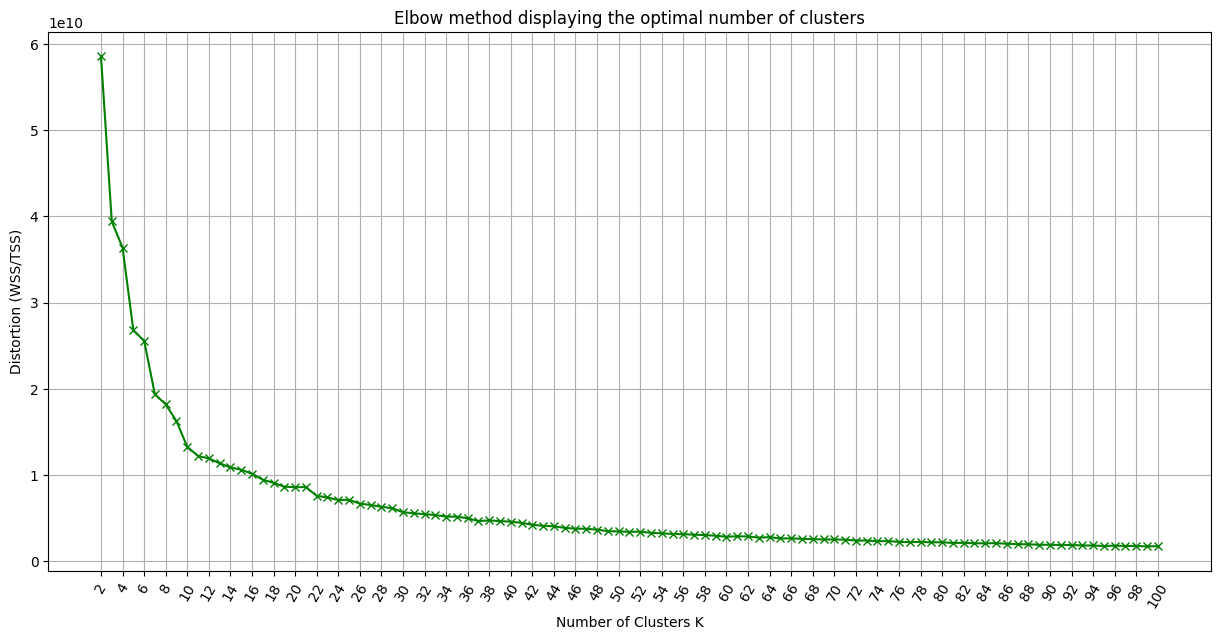

In [15]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(15, 7))
plt.xticks(np.arange(2, 101, step=2), rotation=60)
plt.grid()
plt.plot(range_n_clusters, distortions, 'gx-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Distortion (WSS/TSS)')
plt.title('Elbow method displaying the optimal number of clusters')


plt.show()

In [ ]:
#set k = 10 and analyze
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)
kmeans.fit(X)
c = kmeans.cluster_centers_
l = kmeans.labels_

In [50]:
df_10_cluster = pd.merge(pd.Series(X.index), pd.Series(l, name='cluster'), right_index=True, left_index=True)

In [51]:
df_10_cluster.cluster.value_counts()

1    218
9    137
5     69
0     45
8     19
4      7
3      3
6      3
7      1
2      1
Name: cluster, dtype: int64

In [55]:
print(df_10_cluster.groupby('cluster')['symbol'].apply(list))

cluster
0    [ABT, ACN, AMGN, AMT, AXP, BA, BAC, BMY, CAT, ...
1    [AAP, ABMD, AIZ, AKAM, ALGN, ALK, ALLE, AMP, A...
2                                               [MSFT]
3                                  [AMZN, GOOG, GOOGL]
4                  [JNJ, V, XOM, NVDA, UNH, WMT, TSLA]
5    [ADI, ADP, AEP, AMAT, AMD, AON, APD, BDX, BLK,...
6                                         [C, JPM, GS]
7                                               [AAPL]
8    [ABBV, TMUS, PFE, HD, MCD, NEE, VZ, PEP, PG, T...
9    [A, AAL, ABC, ADM, ADSK, AEE, AJG, ALB, AME, A...
Name: symbol, dtype: object


#### To-do:
* test with cluster no 7. 
* use standard scaler
* dendogram 

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7)
kmeans.fit(X)
c = kmeans.cluster_centers_
l = kmeans.labels_

d:\Py_Prjs\envs\.ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
df_7_cluster = pd.merge(pd.Series(X.index), pd.Series(l, name='cluster'), right_index=True, left_index=True)

In [18]:
df_7_cluster.cluster.value_counts()

0    406
4     67
2     22
3      3
5      3
1      1
6      1
Name: cluster, dtype: int64

In [19]:
print(df_7_cluster.groupby('cluster')['symbol'].apply(list))

cluster
0    [A, AAL, AAP, ABC, ABMD, ADI, ADM, ADSK, AEE, ...
1                                               [AAPL]
2    [ABBV, JNJ, V, TMUS, PFE, HD, VZ, XOM, PEP, PG...
3                                  [AMZN, GOOG, GOOGL]
4    [ABT, ACN, ADP, AMAT, AMD, AMGN, AMT, AXP, BA,...
5                                         [C, JPM, GS]
6                                               [MSFT]
Name: symbol, dtype: object
